<a href="https://colab.research.google.com/github/FatemaSamir/Machine-Learning-Projects/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [ ]:
#read the data

data_path = '/content/countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [ ]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [ ]:
df.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [ ]:
df.sample()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
153,N. Mariana Islands,OCEANIA,82459,477,"172,9","310,69","9,61","7,11",12500.0,"97,0","254,7","13,04","4,35","82,61",2,"19,43","2,29",NaN,NaN,NaN


In [ ]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [ ]:
df.duplicated().any()

False

In [ ]:
df['Country'].is_unique

True

In [ ]:
# df['Region'].unique().sum()

In [ ]:
# skewness along the index axis
df.skew(axis = 0, skipna = True)

Population            9.200223
Area (sq. mi.)        5.964245
GDP ($ per capita)    1.375924
dtype: float64

In [ ]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [ ]:
# import matplotlib.pyplot as plt
# plt.matshow(df.corr())
# plt.show()

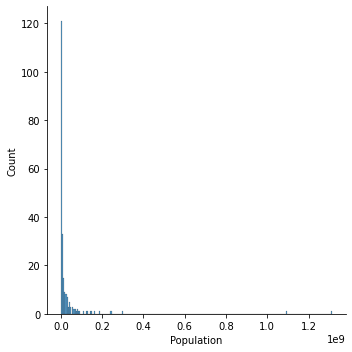

In [ ]:
import seaborn as sns
sns.displot(df, x="Population")

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-  drop un important feature         <br>
2- change data type     <br>
3-  null values     <br>

In [ ]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [ ]:
#solution 
df_copy = df_copy.drop(columns=['Country',	'Region'])

In [ ]:
#test 
df_copy.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


**Second issue**

In [ ]:
#solution 
for i in df_copy.columns:
  if i in ['Population',	'Area (sq. mi.)', 'GDP ($ per capita)'] :
    pass
  else: 
   df_copy[i] = df_copy[i].astype(str).str.replace(',' , '.')
   df_copy[i] =  df_copy[i].astype('float64')

In [ ]:
##test
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          227 non-null    int64  
 1   Area (sq. mi.)                      227 non-null    int64  
 2   Pop. Density (per sq. mi.)          227 non-null    float64
 3   Coastline (coast/area ratio)        227 non-null    float64
 4   Net migration                       224 non-null    float64
 5   Infant mortality (per 1000 births)  224 non-null    float64
 6   GDP ($ per capita)                  226 non-null    float64
 7   Literacy (%)                        209 non-null    float64
 8   Phones (per 1000)                   223 non-null    float64
 9   Arable (%)                          225 non-null    float64
 10  Crops (%)                           225 non-null    float64
 11  Other (%)                           225 non-n

In [ ]:
#solution 
df_copy_na = df_copy.fillna(df_copy.mean())

In [ ]:
#test 
df_copy_na.head(10)

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.000000,46.60,20.34,0.380000,0.240000,0.380000
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.000000,15.11,5.22,0.232000,0.188000,0.579000
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.000000,17.14,4.61,0.101000,0.600000,0.298000
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.000000,22.46,3.27,0.150844,0.282711,0.565283
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.000000,8.71,6.25,0.150844,0.282711,0.565283
5,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,2.139024,45.11,24.20,0.096000,0.658000,0.246000
6,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.000000,14.17,5.34,0.040000,0.180000,0.780000
7,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.000000,16.93,5.37,0.038000,0.220000,0.743000
8,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.000000,16.73,7.55,0.095000,0.358000,0.547000
9,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.000000,12.07,8.23,0.239000,0.343000,0.418000


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [ ]:
from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
# feature Scalling using Standard Scaler
scaler = StandardScaler()
df_copy_na[df_copy_na.columns] = scaler.fit_transform(df_copy_na.values)
df_copy_na
# normalizer = preprocessing.Normalizer().fit(X) 


,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.019695,0.027583,-0.199844,-0.293443,4.750696e+00,3.636688e+00,-8.985536e-01,-2.481004e+00,-1.032796e+00,-0.128695,-0.523020,0.374938,-1.717937,2.210300,2.249075e+00,1.619132e+00,-3.211494e-01,-1.158818
1,-0.213877,-0.318797,-0.153603,-0.275974,-1.025201e+00,-3.987536e-01,-5.187348e-01,1.939599e-01,-7.312001e-01,0.562986,-0.017364,-0.445827,1.298569,-0.632321,-8.149012e-01,5.734169e-01,-7.121448e-01,0.085790
2,0.035618,0.998421,-0.220490,-0.292889,-8.834605e-02,-1.284888e-01,-3.688063e-01,-6.800381e-01,-7.005969e-01,-0.816517,-0.519408,0.928767,-1.717937,-0.449072,-9.385141e-01,-3.521823e-01,2.385742e+00,-1.671672
3,-0.243834,-0.334779,-0.053514,0.514709,-4.281495e+00,-7.479882e-01,-1.689017e-01,7.501404e-01,1.039557e-01,-0.293124,1.256409,-0.414019,-0.209684,0.031168,-1.210057e+00,1.961110e-16,4.173963e-16,0.000000
4,-0.243720,-0.334629,-0.137002,-0.293443,1.354081e+00,-8.968049e-01,9.305737e-01,9.090492e-01,1.158212e+00,-0.893713,-0.549507,1.006727,1.298569,-1.210053,-6.061780e-01,1.961110e-16,4.173963e-16,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,-0.223408,-0.331610,0.024662,-0.293443,6.070728e-01,-4.529206e-01,-8.885583e-01,-7.527430e-16,-4.029923e-01,0.239532,1.734375,-1.091961,1.298569,0.862560,-1.078338e+00,-4.299044e-01,-2.038365e-02,0.404760
223,-0.242004,-0.185982,-0.228217,-0.287620,-4.295642e-18,-4.051365e-16,1.818122e-16,-7.527430e-16,3.781713e-16,-1.063546,-0.549507,1.143937,-1.717937,0.000000,7.199359e-16,1.961110e-16,4.173963e-16,-1.033732
224,-0.061923,-0.039330,-0.204312,-0.288452,-7.867312e-03,7.410341e-01,-8.885583e-01,-1.728836e+00,-8.819983e-01,-0.850483,-0.520612,0.956833,-1.717937,1.875396,-1.907579e-01,-1.119504e-01,1.423292e+00,-1.077512
225,-0.146545,0.086427,-0.219584,-0.293443,-7.867312e-03,1.504789e+00,-8.885583e-01,-1.185606e-01,-1.010620e+00,-0.518538,-0.545895,0.702371,-0.209684,1.704784,2.165991e+00,4.886292e-01,5.480778e-02,-0.477098


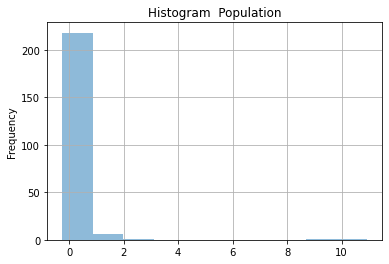

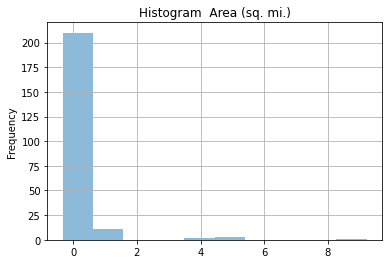

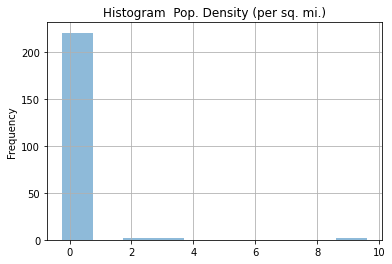

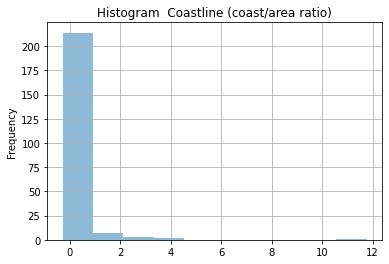

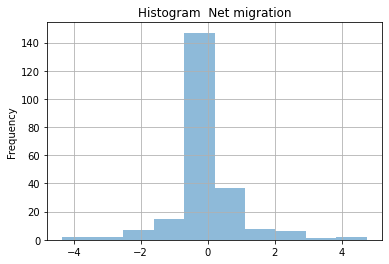

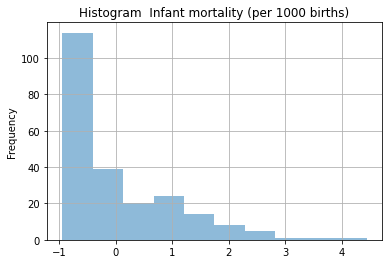

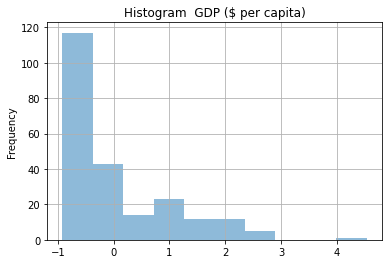

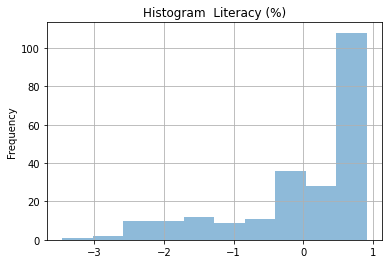

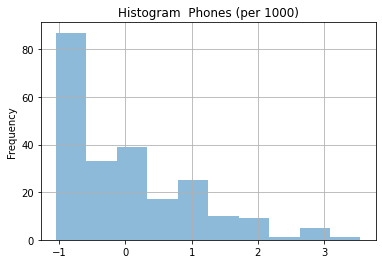

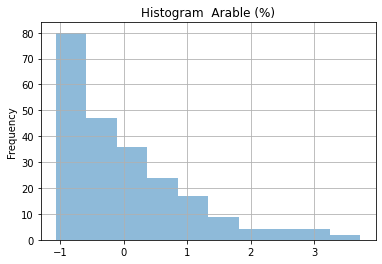

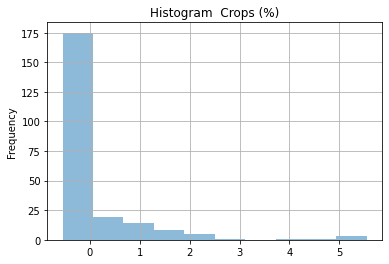

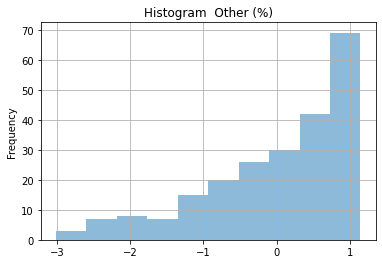

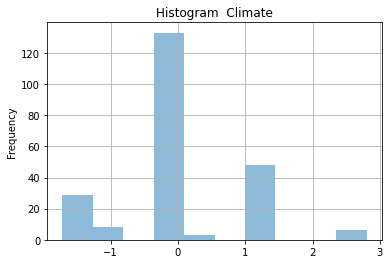

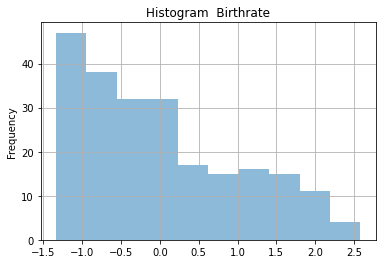

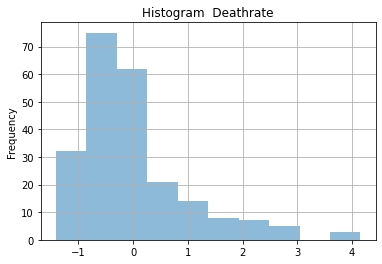

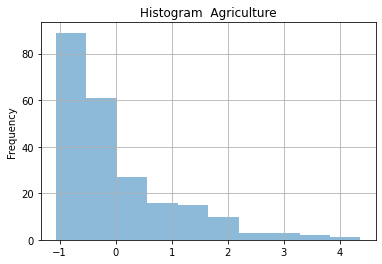

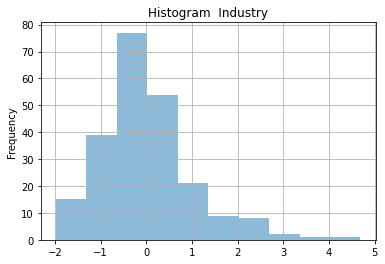

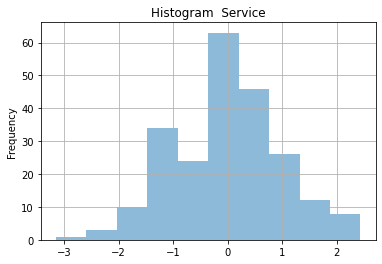

In [ ]:
for col in df_copy_na.columns: # histogram for each column 
  df_copy_na[col].plot.hist(alpha=0.5,  grid=True, legend=None)  
  plt.title("Histogram  "+ col)
  plt.show()

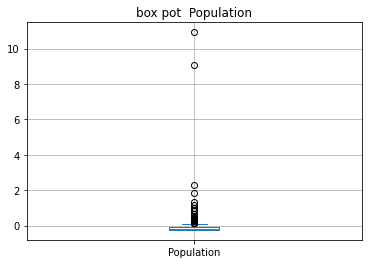

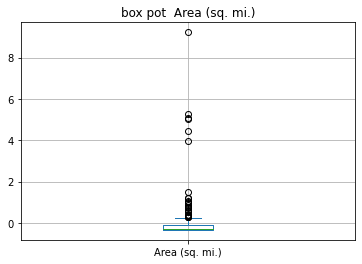

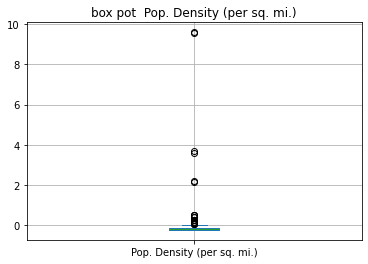

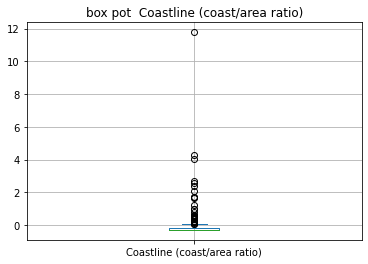

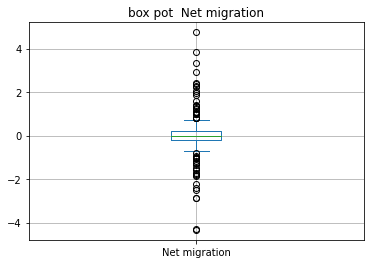

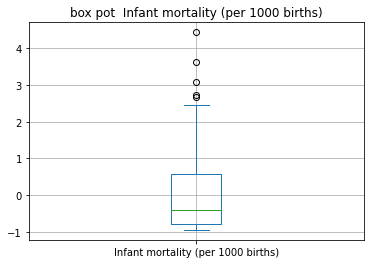

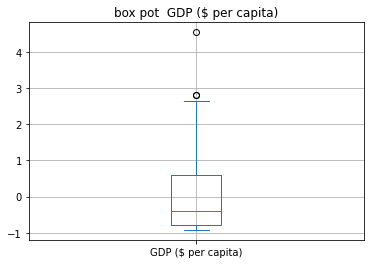

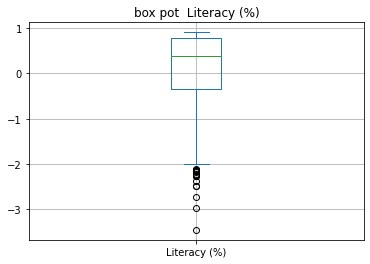

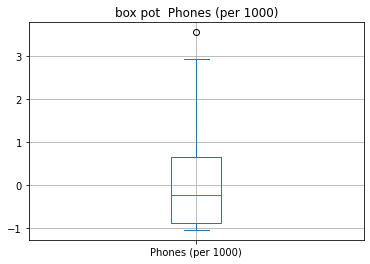

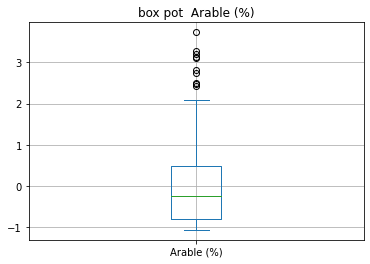

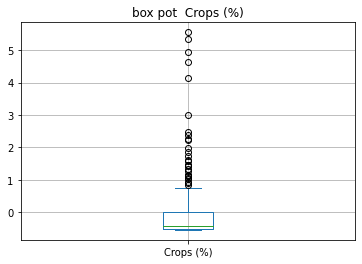

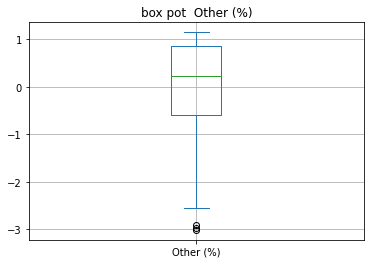

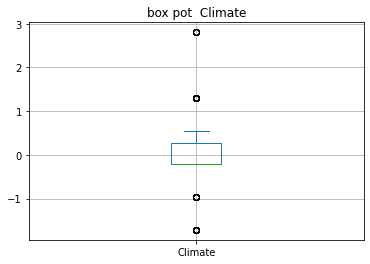

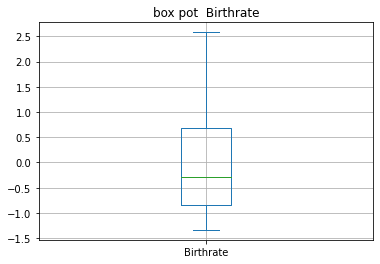

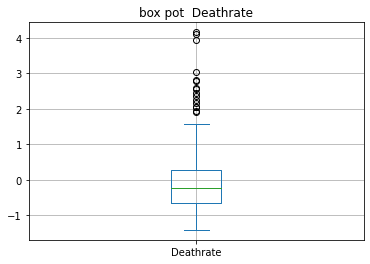

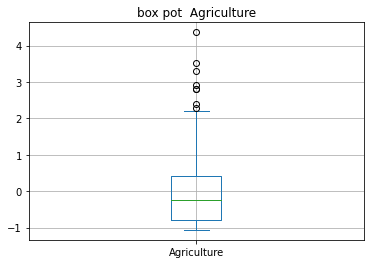

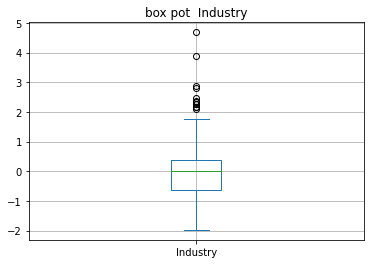

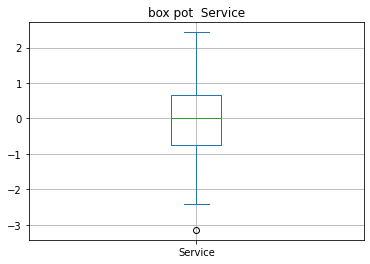

In [ ]:
for col in df_copy_na.columns:
  df_copy_na[col].plot(kind='box',  grid=True)  
  plt.title("box pot  "+ col)
  plt.show()

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

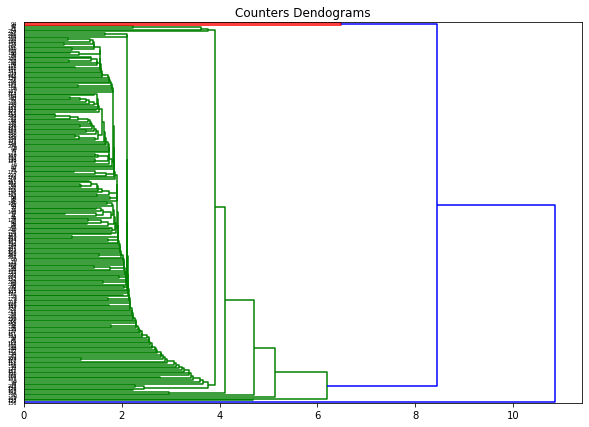

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y= df_copy_na , method='single',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

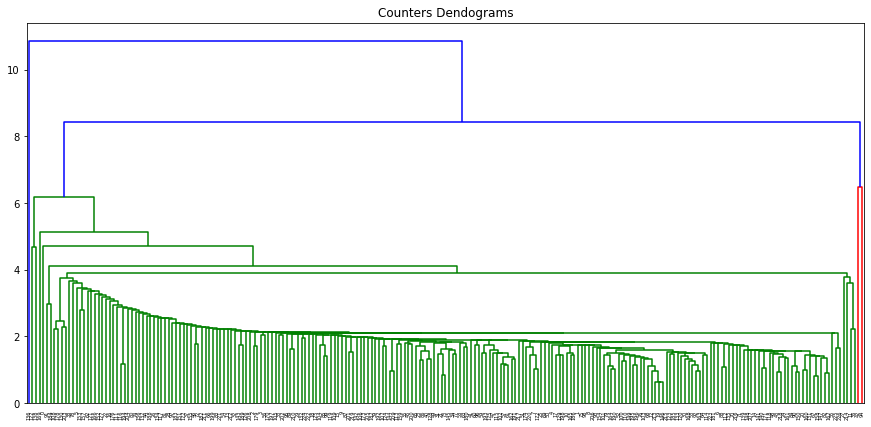

In [ ]:
# using 'single' method 
plt.figure(figsize=(15, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y= df_copy_na , method='single',metric='euclidean'),orientation='top') #fill y with your dataframe
    

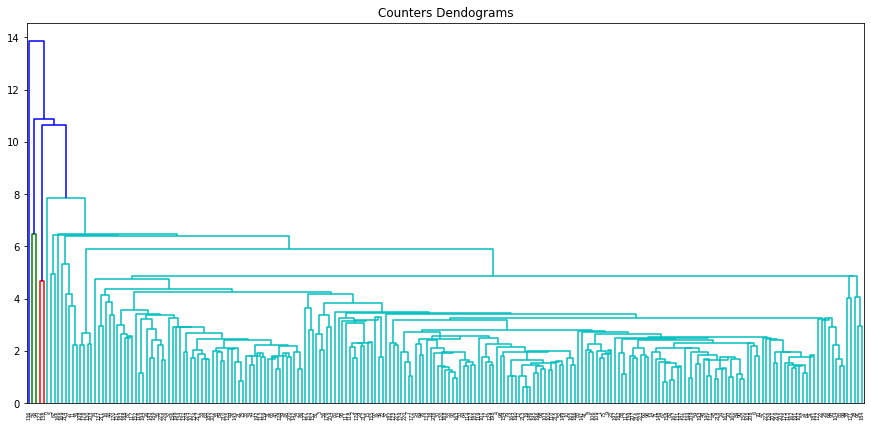

In [ ]:
# using 'centroid' method  to see it's affect the optimum number of clusters
plt.figure(figsize=(15, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y= df_copy_na , method='centroid',metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria

[3 0 0 0 2 3 0 0 0 0 2 1 2 3 0 0 3 2 0 2 0 3 2 3 0 0 3 1 2 0 0 3 3 3 3 3 1
 0 2 3 3 0 1 0 3 3 3 0 0 3 0 0 2 0 2 3 0 0 3 0 0 0 3 3 0 3 2 0 2 2 0 0 3 3
 0 0 2 3 2 2 0 0 0 0 3 2 3 3 0 3 3 2 0 2 1 0 0 0 2 2 2 2 0 2 2 0 0 3 0 0 2
 0 0 3 0 0 3 3 0 2 0 2 2 0 3 3 0 0 3 2 0 0 3 0 3 0 0 0 2 0 0 3 3 3 0 3 2 0
 0 2 3 3 3 0 2 0 3 0 0 3 0 0 0 0 2 2 0 0 0 1 3 0 0 0 0 0 0 2 0 0 3 0 0 3 2
 0 2 0 3 3 2 0 3 0 3 2 2 3 2 3 3 0 3 0 0 0 0 3 0 0 3 0 0 2 1 0 3 3 0 0 0 0
 0 0 3 3 3]


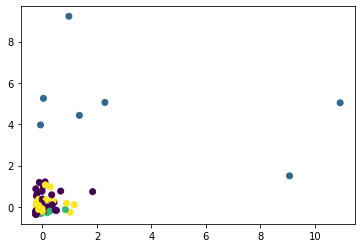

In [ ]:
#training
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4).fit(df_copy_na)
labels = clustering.labels_
print(labels)
plt.scatter(df_copy_na['Population'], df_copy_na['Area (sq. mi.)'],c=labels)

[3 0 4 0 2 3 4 4 4 0 2 1 2 3 4 4 3 2 0 2 4 3 2 3 4 0 3 1 2 4 0 3 3 3 3 3 1
 4 2 3 3 4 1 4 3 3 3 0 4 3 0 0 2 0 2 3 0 0 3 4 4 0 3 3 0 3 2 4 2 2 4 4 3 3
 0 0 2 3 2 2 4 0 4 0 3 2 3 3 4 3 3 2 0 2 1 4 4 4 2 2 2 2 0 2 2 4 0 3 0 0 2
 4 4 3 0 0 3 3 4 2 0 2 5 0 3 3 0 4 3 2 0 4 3 0 3 4 0 0 5 4 4 3 3 3 4 3 2 4
 4 2 3 3 3 4 2 4 3 4 4 3 4 4 0 0 2 2 4 4 0 1 3 4 4 0 4 0 0 2 0 4 3 0 0 3 2
 0 2 4 3 3 2 0 3 4 3 2 2 3 2 3 3 4 3 0 0 0 0 3 4 4 3 0 4 2 1 4 3 3 4 4 4 0
 0 4 3 3 3]


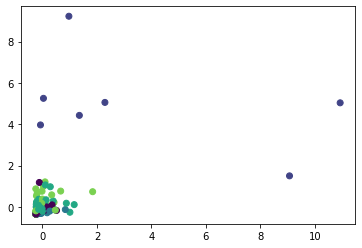

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=6).fit(df_copy_na)
labels = clustering.labels_
print(labels)
plt.scatter(df_copy_na['Population'], df_copy_na['Area (sq. mi.)'],c=labels)

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 